Osnabrück University - Computer Vision (Winter Term 2021/22) - Prof. Dr.-Ing. G. Heidemann, Ulf Krumnack, Axel Schaffland

# Exercise Sheet 03: Morphological Operations¶

## Introduction

This week's sheet should be solved and handed in before the end of **Tuesday, November 23, 2021**. If you need help (and Google and other resources were not enough), feel free to contact your groups' designated tutor or whomever of us you run into first. Please upload your results to your group's Stud.IP folder.

## Assignment 0: Math recap (complex numbers) [0 Points]

This exercise is supposed to be very easy, does not give any points, and is voluntary. There will be a similar exercise on every sheet. It is intended to revise some basic mathematical notions that are assumed throughout this class and to allow you to check if you are comfortable with them. Usually you should have no problem to answer these questions offhand, but if you feel unsure, this is a good time to look them up again. You are always welcome to discuss questions with the tutors or in the practice session. Also, if you have a (math) topic you would like to recap, please let us know.

**a)** What is a *complex number*, what is the *complex plane*, how are complex numbers usually denoted?

YOUR ANSWER HERE

**b)** What is the *real* and the *imaginary* part of a complex number? What is the *absolute value* of a complex number? What is the *complex conjugate*?

YOUR ANSWER HERE

**c)** What are polar coordinates? What are their advantages? Can you convert between cartesian and polar coordinates? Can you write down $i=\sqrt{-1}$ in polar coordinates? What about $\sqrt{i}$?

YOUR ANSWER HERE

**d)** Python, and also numpy, support calculations with complex numbers. Consult the documentation to find out details. Notice that $i$ is substituted by $j$ in Python.

In [ ]:
# YOUR CODE HERE

## Assignment 1: Properties of morphological operators [5 Points]

This exercise will elaborate on the basic morphological operators of *erosion* and *dilation* (cf. CV-05 slides 4-14).

### a) Duality

Proof that *erosion* and *dilation* are *dual* operators, i.e.

$$ g^{\ast}\oplus S = (g\ominus S)^{\ast}\qquad\text{and}\qquad
g^{\ast}\ominus S = (g\oplus S)^{\ast}$$

here $g^{\ast}$ denotes the inverted binary image, i.e. $g^{\ast}(x,y) = 1 - g(x,y) = \neg g(x,y)$, i.e. 1-pixel become 0 and 0-pixel become 1.

Given the formulas from CV05 - Morphological Operations for erosion and dilation for the first proof:\
\begin{align*}
    g^\ast \oplus S &= \bigvee_k \bigvee_l S(k+m,l+n) \wedge g^\ast(x+k,y+l) \qquad &k \in [-m,m], l \in [-n,n]\\
    &= \bigvee_k \bigvee_l S(k+m,l+n) \wedge \neg g(x+k,y+l) \qquad &\text{Negate twice} \\
    &= \bigvee_k \bigvee_l \neg \neg \left(S(k+m,l+n) \wedge \neg g(x+k,y+l)\right) \qquad &\text{De Morgan's law}\\
    &= \bigvee_k \bigvee_l \neg \left(\neg S(k+m,l+n) \vee \neg \neg g(x+k,y+l)\right) \qquad &\text{Solve double negation}\\
    &= \bigvee_k \bigvee_l \neg \left(\neg S(k+m,l+n) \vee g(x+k,y+l)\right) \qquad &\neg a \vee b \equiv a \rightarrow b\\
    &= \bigvee_k \bigvee_l \neg \left(S(k+m,l+n) \rightarrow g(x+k,y+l)\right) \qquad &\text{De Morgan's law}\\
    &= \neg \left(\bigwedge_k \bigwedge_l (S(k+m,l+n) \rightarrow g(x+k,y+l))\right) \\
    &= (g \ominus S)^\ast
\end{align*}
\
For the second proof: 
\begin{align*}
    g^{\ast}\ominus S &= \bigwedge_k \bigwedge_l (S(k+m,l+n) \rightarrow g^\ast(x+k,y+l)) \qquad & k \in [-m,m], l \in [-n,n]\\
    &= \bigwedge_k \bigwedge_l (S(k+m,l+n) \rightarrow \neg g(x+k,y+l)) \qquad &\text{Solve the implication:} \neg a \vee b \equiv a \rightarrow b\\
    &= \bigwedge_k \bigwedge_l (\neg S(k+m,l+n) \vee \neg g(x+k,y+l)) \qquad &\text{De Morgan's law}\\
    &= \bigwedge_k \bigwedge_l \neg (S(k+m,l+n) \wedge g(x+k,y+l)) \qquad &\text{De Morgan's law}\\ 
    &= \neg \left(\bigvee_k \bigvee_l S(k+m,l+n) \wedge g(x+k,y+l)\right) \\
    &= (g \oplus S)^\ast
\end{align*}

### b) Superposition

As *erosion* and *dilation* have been introduced for binary images, the notion of *linearity* is not really appropriate here. However, some weaker version, called *superposition* can be defined: instead of forming linear combination, one takes the logical disjunction:

$$(g_1\lor g_2)(x,y) := g_1(x,y)\lor g_2(x,y)$$

Check for both operations if *erosion* and *dilation* are "compatible" with superposition, i.e. if first *eroding* (or *dilating*) two images and superposing the result is the same as first superposing the images and then *eroding* (or *dilating*) the result.

According to the code below, erosion and dilation are not compatible with superposition.

Images are not the same.


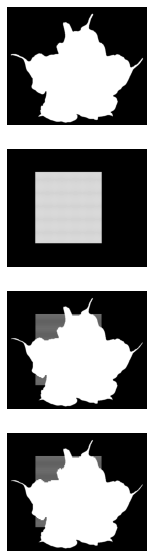

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage.morphology as morph
from imageio import imread

img1 = imread("images/engelstrompete.png") > 0
img2 = np.zeros((img1.shape[0], img1.shape[1]), np.int32)

# structuring element
s = np.ones((3,3))

# create another image
for row in range(img2.shape[0]):
    for col in range(img2.shape[1]):
        if row > img2.shape[0] / 5 and row < 4 * img2.shape[0] / 5 and col > img2.shape[1] / 5 and col < 4 * img2.shape[0] / 5:
            if not row % 5 == 0 or col % 5 == 0:
                img2[row][col] = 1
# Erode both images
img1_eroded = morph.binary_erosion(img1, s)
img2_eroded = morph.binary_erosion(img2, s)

# Superposition of both eroded images
img_super_eroded = img1_eroded | img2_eroded

# Superposition of both images
img_super = img1 | img2

# Erosion of superposition
img_eroded_super = morph.binary_erosion(img_super, s)

if np.array_equal(img_super_eroded, img_eroded_super):
    print("Images are the same.")
else:
    print("Images are not the same.")

plt.figure(figsize=(10,10))
plt.subplot(4,1,1); plt.imshow(img1); plt.axis('off')
plt.subplot(4,1,2); plt.imshow(img2); plt.axis('off')
plt.subplot(4,1,3); plt.imshow(img_super_eroded); plt.axis('off')
plt.subplot(4,1,4); plt.imshow(img_eroded_super); plt.axis('off')
plt.show()

### c) Chaining

Show that *dilation* and *erosion* have the following properties: given two structering elements $S_1$ and $S_2$, it holds

\begin{align}
  (g\oplus S_1)\oplus S_2 & & = & g\oplus (S_1\oplus S_2) && = (g\oplus S_2)\oplus S_1 \\
  (g\ominus S_1)\ominus S_2 & & = & g\ominus (S_1\ominus S_2) && = (g\ominus S_2)\ominus S_1 \\  
\end{align}

What are the practical consequences?

If we want to dilate an image with more than one structuring element, we can first dilate the strucuring elements with each other. This reduces the complexity of dilating with several structuring elements, since structuring elements are usually significantly smaller than the image. \
\
Proof for dilation: \
Let $k_1 \in [-m_1,m_1], l_1 \in [-n_1,n_1], k_2 \in [-m_2,m_2], l_2 \in [-n_2,n_2]$\
\begin{align*}
    (g \oplus S_1) \oplus S_2 &=\left(\bigvee_{k_1} \bigvee_{l_1} S_1(k_1+m,l_1+n) \wedge g(x+k_1,y+l_1)\right) \oplus S_2 \\
    &=\bigvee_{k_2} \bigvee_{l_2} S_2(k_2+m,l_2+n) \wedge \left(\bigvee_{k_1} \bigvee_{l_1} S_1(k_1+m,l_1+n) \wedge g(x+k_1,y+l_1)\right)(k_2+m,l_2+n) \\
    &= \dots
\end{align*}

## Assignment 2: Application [5 Points]


### a) Boundary extraction

Extract the boundary of a shape using opening or closing. You may use `binary_dilation` or `binary_erosion` from `scipy.ndimage.morphology`. Can you achieve a thicker boundary?

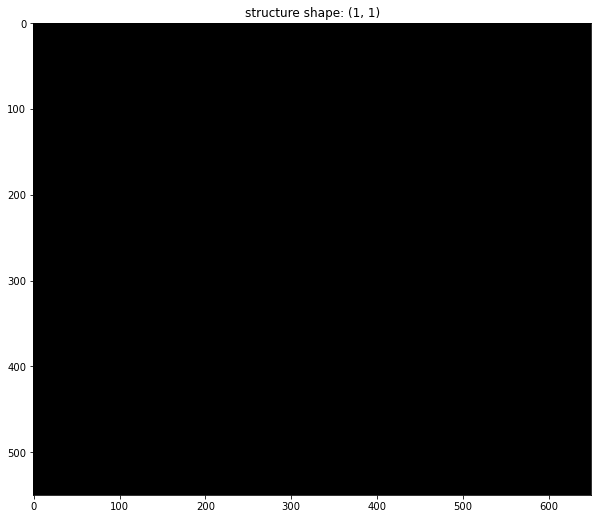

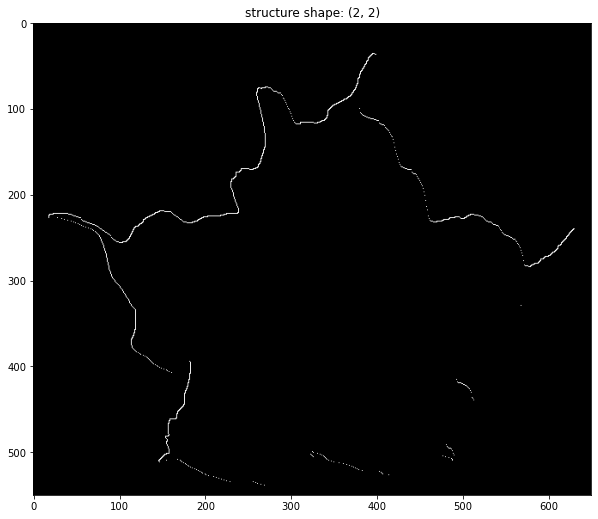

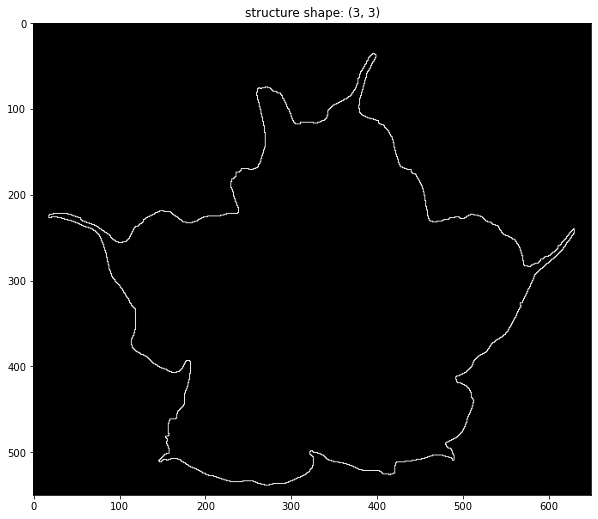

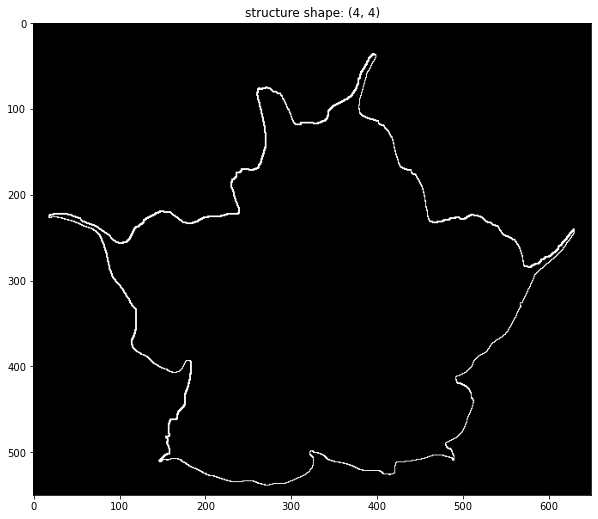

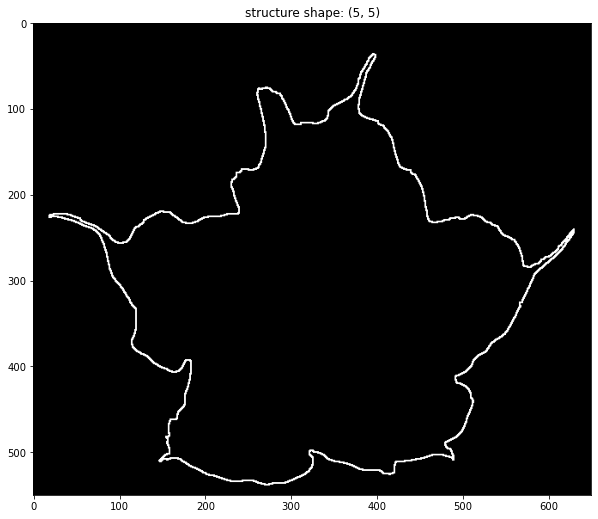

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['image.cmap'] = 'gray'
import scipy.ndimage.morphology as morph
from imageio import imread

def my_boundary(img, structure):
    """
    Compute boundary of binary image.

    Parameters
    ----------
    img : ndarray of bools
        A binary image.
    structure: ndarray of int
        2d-matrix of one's; shape is set outside of function
        
    Returns
    -------
    boundary : ndarray of bools
        The boundary as a binary image.
    """
    
    boundary = np.zeros(img.shape, bool)
    
    # xor for binary: ^
    boundary = img ^ morph.binary_erosion(img, structure)
    
    return boundary
    
# the structure indirectly decides thickness of border by shape; use different structures
struc_shape = 5
structures = list()
for dim in range(1, struc_shape+1):  # +1 to include struc_shape value
    structures.append(np.ones((dim, dim)))
    
for struc in structures:
    img = imread("images/engelstrompete.png") > 0
    plt.figure(figsize=(10,10))
    plt.title("structure shape: {}".format(struc.shape))
    plt.gray()
    plt.imshow(my_boundary(img, struc))
    plt.show()

### b)  Distance transform

Implement distance transform according to the ideas of (CV-05 slides 34ff).  Discuss the effect of different structuring elements.

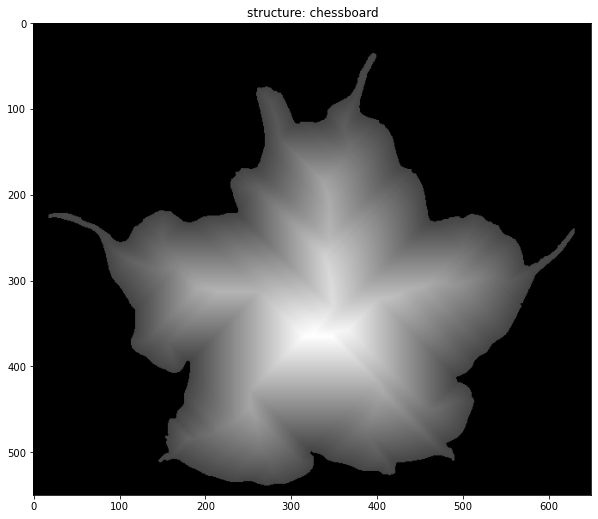

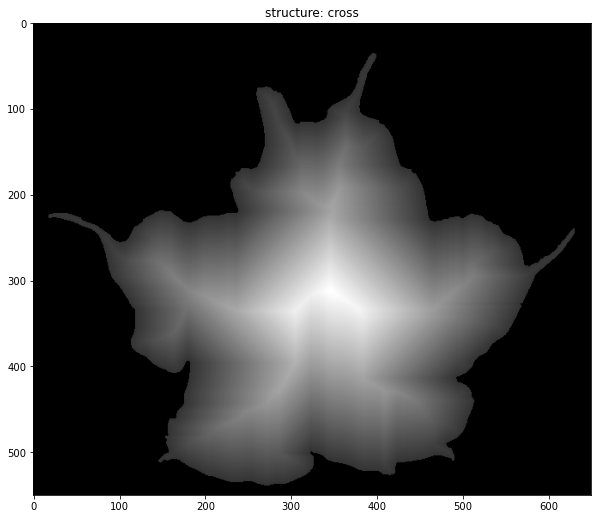

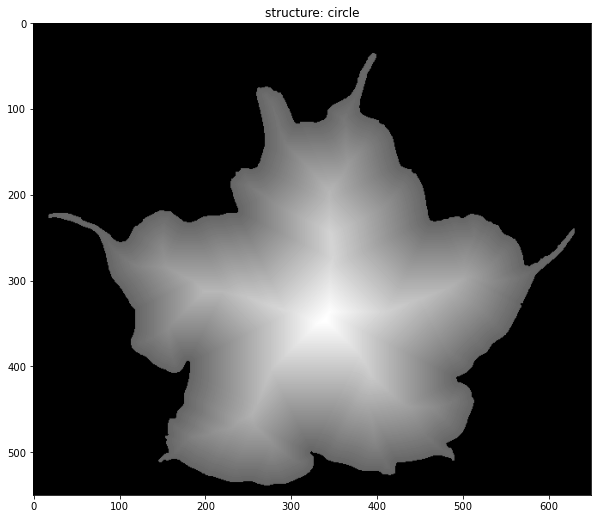

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import morphology as morph, generate_binary_structure
from imageio import imread

def my_distance_transform(img, structure):
    """Distance transform of binary image.

    Parameters
    ----------
    img : ndarray of bools
        A binary image.
    structure: ndarray of int
        2d-matrix of one's; shape is set outside of function
        
    Returns:
    dt (ndarray of ints): The distance transform of the input image.
    """
    
    dt = np.zeros(img.shape,np.int32)
    
    # calculae distance transform
    for bound_degree in range(img.shape[0]):
        dt += bound_degree * ((img ^ morph.binary_erosion(img, structure, bound_degree)) ^ 
                              (img ^ morph.binary_erosion(img, structure, bound_degree + 1)))
            
    return dt

# create new instance
structures = dict()

# add chessboard distance transform with 3x3 square structure
structures["chessboard"] = np.ones((3, 3))

# add city block distance transform with cross shaped structure
cross_shaped = np.array([[0, 1, 0],
                         [1, 1, 1],
                         [0, 1, 0]])
structures["cross"] = cross_shaped

# add euclidian distance transform with circle shaped structure
circle_shaped = np.array([[0, 1, 1, 1, 0],
                          [1, 1, 1, 1, 1],
                          [1, 1, 1, 1, 1],
                          [1, 1, 1, 1, 1],
                          [0, 1, 1, 1, 0]])
structures["circle"] = circle_shaped

for name, struc in structures.items():
    img = imread("images/engelstrompete.png") > 0
    plt.figure(figsize=(10,10))
    plt.title("structure: {}".format(name))
    plt.imshow(my_distance_transform(img, struc) + 50 * img)
    plt.show()

Bigger structuring elements make the boundary thicker. Therefore there are less 'distance steps' in the distance transform.

### c) Morphing

Write a function `my_morph` that implements morphing according to (CV-05 slide 41). You may use your function `my_distance_transform` from part b), or the function `distance_transform_edt` from `scipy.ndimage.morphology`.

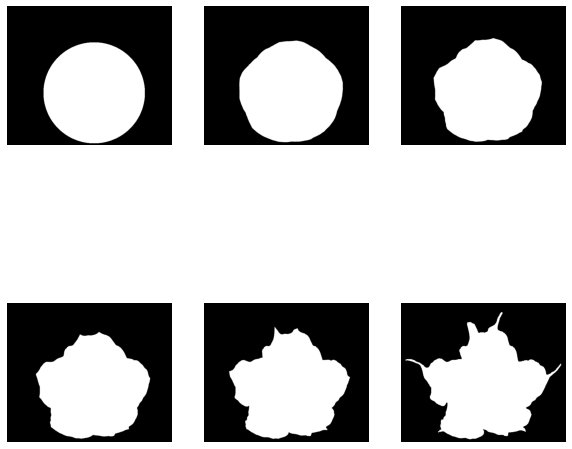

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage.morphology as morph
from imageio import imread


def my_morph(A,B,ratio):
    """Morphing from binary image A to image B.

    Args:
        A (ndarray of bools): A binary image (start).
        B (ndarray of bools): A binary image (target), same shape as A.
        ratio (float from 0.0 to 1.0): The ratio of image A and image B.
            0.0=only image A, 1.0=only image B.
        
    Returns:
        morph (ndarray of bools): A binary intermediate image between A and B.
        
    """

    result = np.zeros(A.shape, bool)
    # YOUR CODE HERE
    # Get the distance transforms of A and B
    d_a = morph.distance_transform_edt(A)
    d_b = morph.distance_transform_edt(B)
    
    # Get the distance transforms inverted A and B
    d_a_inverted = morph.distance_transform_edt(np.invert(A))
    d_b_inverted = morph.distance_transform_edt(np.invert(B))
    
    # get the generalized distance transform of A and B
    d_a_generalized = d_a - d_a_inverted
    d_b_generalized = d_b - d_b_inverted
    
    # compute the morphed image
    result = ratio * d_b_generalized + (1 - ratio) * d_a_generalized
    
    # binarize the image
    result[result > 1] = 1
    result[result <= 0] = 0
    
    return result

img1 = imread("images/kreis.png") > 0
img2 = imread("images/engelstrompete.png") > 0


plt.figure(figsize=(10,10))
plt.gray()
for i, ratio in enumerate(np.linspace(0, 1, 6), 1):
    plt.subplot(2, 3, i)
    plt.imshow(my_morph(img1, img2, ratio))
    plt.axis('off')
plt.show()

<IPython.core.display.Javascript object>


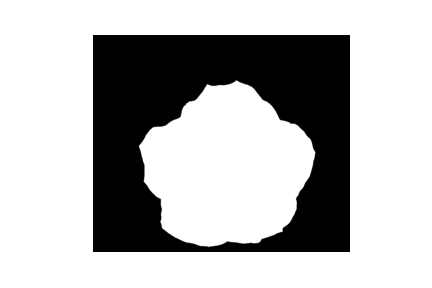

In [5]:
# If you want to see your morph as an animation, run this cell. 
# Close the output (press the blue "Stop interaction" button) once you are done!

# Due to some matplotlib problem you may have to restart your kernel!
%matplotlib notebook
import matplotlib.animation as animation
fig = plt.figure()

ims = []
for i, ratio in enumerate(np.linspace(0, 1, 24), 1):
    plt.axis('off')
    im = plt.imshow(my_morph(img1, img2, ratio), cmap='gray', animated=True)
    ims.append([im])  
    
ani = animation.ArtistAnimation(fig, ims + list(reversed(ims)), interval=100, blit=True)

fig.show()

## Assignment 3: Implementation: Skeletonization [5 Points]

### a) Skeletonization with hit-or-miss

Explain in your own words, how the hit-or-miss operator can be used for skeletonization (cf CV-05 slide 49).  

With the hit-or-miss operation, every pixel which is not part of a ridge can be removed.

### b) Implementation of skeletonization

Now use this method to implement your own skeletonization function. It is ok to use
`scipy.ndimage.morphology.binary_hit_or_miss` here (but of course *not* `skimage.morphology.skeletonize` or similar functions). Compare your result with (CV-05 slide 50). Note that computing the skeleton using this method may take some time ...

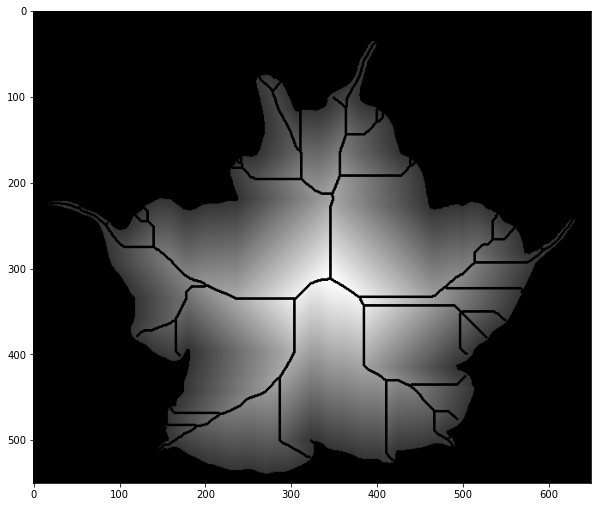

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage.morphology as morph
from imageio import imread
from skimage import morphology

def my_skeletonize(img):
    """
    Compute the skeloton of a binary image using hit_or_miss operator.
    
    Parameters
    ----------
    img : ndarray of bools
        Binary image to be skeletonized.
    
    Returns
    -------
    skeleton : ndarray of bools
        The skeleton of the input image.
    """
    # YOUR CODE HERE
    #dt_img = morph.distance_transform_edt(img)
    
    vertical = [[0, 0, 1],
                [0, 1, 1],
                [0, 0, 1]]
    
    vertical_c = [[1, 0, 0],
                  [1, 0, 0],
                  [1, 0, 0]]
    
    diagonal = [[0, 0, 0],
                [0, 1, 1],
                [0, 1, 1]]
    
    diagonal_c = [[1, 1, 0],
                  [1, 0, 0],
                  [0, 0, 0]]
    
    # hit-or-miss operators
    operators = [vertical, np.rot90(vertical), np.rot90(vertical, 2), np.rot90(vertical, 3),
                 diagonal, np.rot90(diagonal), np.rot90(diagonal, 2), np.rot90(diagonal, 3)]
    
    # complementary hit-or-miss operators
    operators_c = [vertical_c, np.rot90(vertical_c), np.rot90(vertical_c, 2), np.rot90(vertical_c, 3),
                   diagonal_c, np.rot90(diagonal_c), np.rot90(diagonal_c, 2), np.rot90(diagonal_c, 3)]
    
    skeleton = img.copy()
    
    while (True):
        old_img = skeleton
        for i in range(len(operators)):
            hom_img = morph.binary_hit_or_miss(skeleton, operators[i], operators_c[i])
            # Delete pixels from skeleton that were hit by hit-or-miss
            skeleton = skeleton ^ hom_img
        
        if(np.array_equal(old_img, skeleton)):
            return skeleton
    
img = imread("images/engelstrompete.png") > 0
skel = my_skeletonize(img)
result = morph.distance_transform_cdt(img, metric='taxicab') + (50 * img)
result[morph.binary_dilation(skel)] = 0
plt.figure(figsize=(10,10))
plt.gray()
plt.imshow(result)
plt.show()

## Assignment 4: Custom Structuring Element [5 points]

Landsat 7 is a satelite mission for acquisition of satellite imagery of Earth. Unfortunately the Scan Line Corrector failed, resulting in black stripes on the aquired images. More information: https://landsat.usgs.gov/slc-products-background


### a) A first fix

A rather crude fix is to apply a custom structuring element for dilation and erosion (see CV-05, 24ff). Complement the code below (in part (b)) in the following way:
* Rotate the image such that the gaps are horizontal.
* Dilate the rotated image with a vertical structuring element. I.e. take the maximum of an area of size $7 \times1$ and assign it to the center pixel. Repeat for all pixels.
* Erode the dilated image.
* Rotate the result back.

Remark: this exercise applies morphological operator to color images. This extends the idea of generalizing morphological operators to gray value images (CV-05, slide 51).  

### b) Improving the solution
You may get better results by thresholding and applying the morphological operations only to pixels below a threshold, i.e. gap pixels. Compliment your solution from a). 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


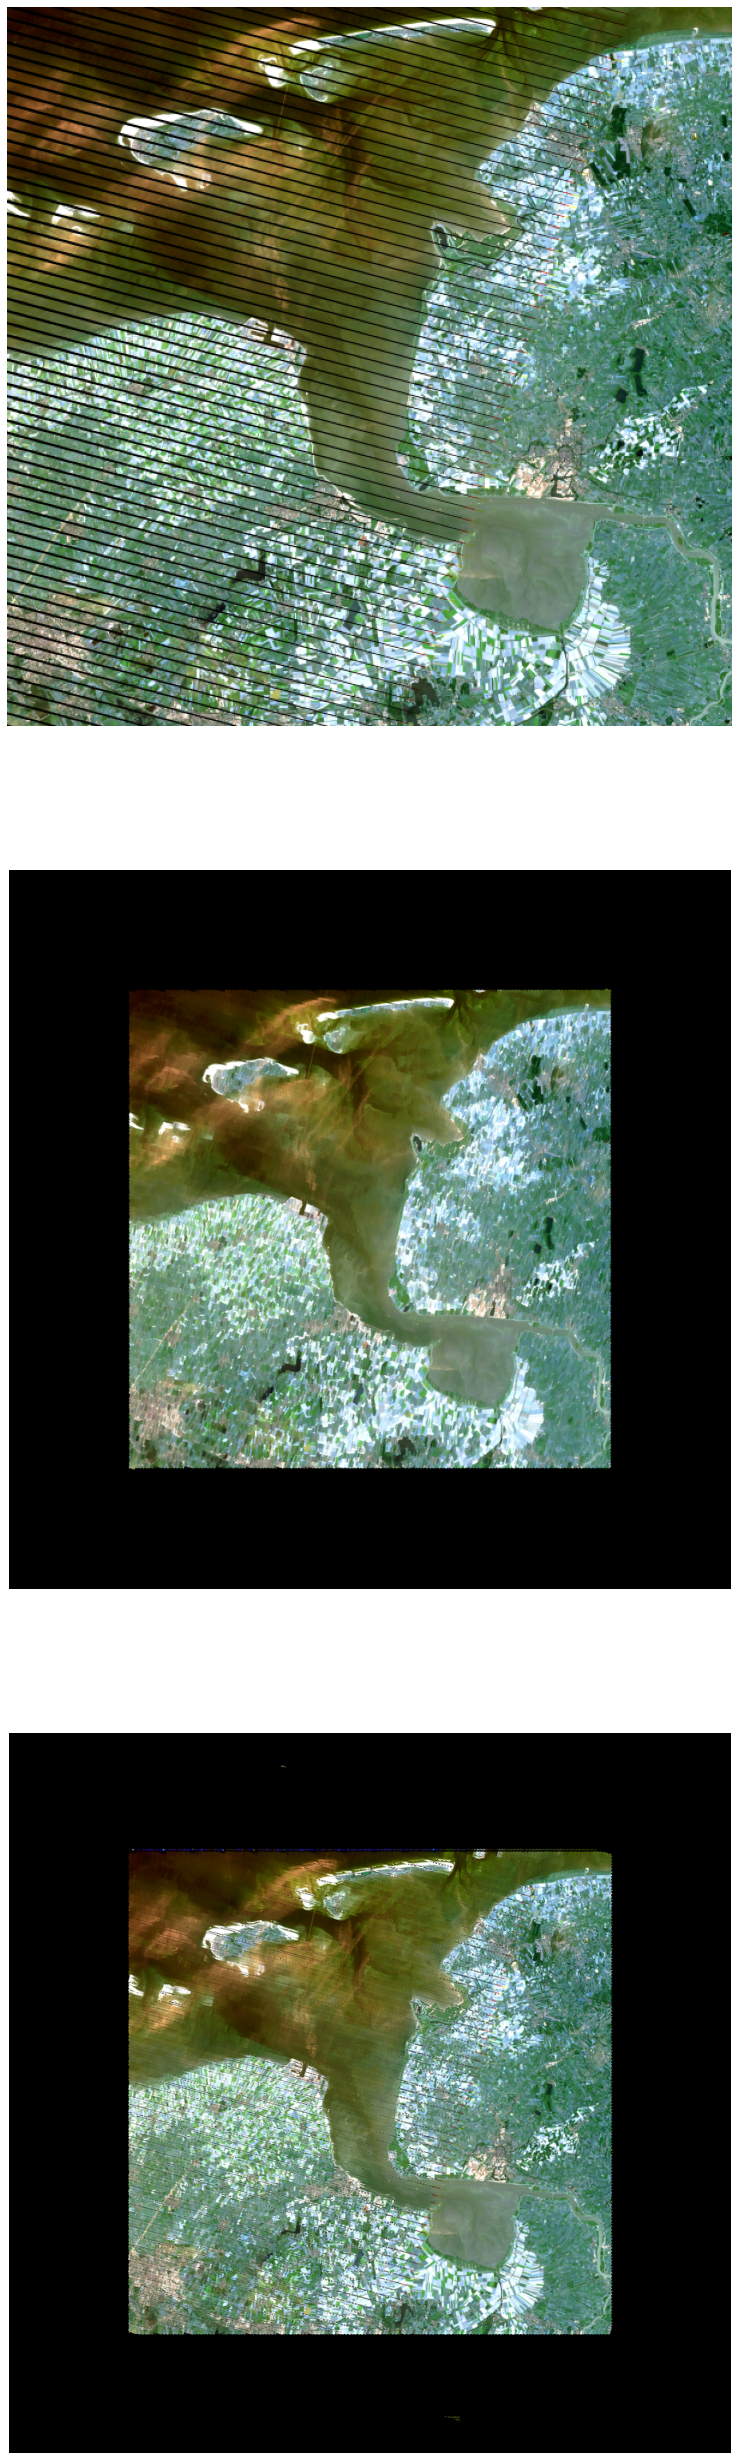

In [13]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage.morphology as morph
import scipy.ndimage as ndimg
from skimage import color
from skimage.transform import rescale as rescale
from imageio import imread
from skimage.morphology import erosion, dilation


angle = 15
thresh = .3
struc_elem = np.ones((5,1), dtype=bool)

img = imread("images/landsat_stack2.png")
img2 = img.copy()
img3 = img.copy()

# YOUR CODE HERE
############################################ Exercise a ################################################################
img3 = ndimg.interpolation.rotate(img3, angle=angle)

# do dilation and erosion on color channels seperately
img3[:, :, 0] = dilation(img3[:, :, 0] , struc_elem)
img3[:, :, 1] = dilation(img3[:, :, 1] , struc_elem)
img3[:, :, 2] = dilation(img3[:, :, 2] , struc_elem)

img3[:, :, 0] = erosion(img3[:, :, 0] , struc_elem)
img3[:, :, 1] = erosion(img3[:, :, 1] , struc_elem)
img3[:, :, 2] = erosion(img3[:, :, 2] , struc_elem)

img3 = ndimg.interpolation.rotate(img3, angle=(360-angle))

############################################ Exercise b ################################################################
img_thresh = img.copy()
img_thresh = (img_thresh - np.min(img_thresh))/np.ptp(img_thresh)

# rotate the image
img_thresh = ndimg.interpolation.rotate(img_thresh, angle=angle)

img_dilated = img_thresh.copy()

# dilate the rotated image
for i in range(img_thresh.shape[0]):
    for j in range(img_thresh.shape[1]):
        max_r = 0
        max_g = 0
        max_b = 0
        # Skip, if the pixels values aren't lower than the threshold
        if not (img_thresh[i][j][0] < thresh and img_thresh[i][j][1] < thresh and img_thresh[i][j][2] < thresh):
            continue
        # Structuring element is a (7,1) array with 1's
        for val in range(-3, 4):

            # Take the maximum for the rgb values
            if img_thresh[(i + val) % img_thresh.shape[0]][j][0] > max_r:
                max_r = img_thresh[(i + val) % img_thresh.shape[0]][j][0]

            if img_thresh[(i + val) % img_thresh.shape[0]][j][1] > max_g:
                max_g = img_thresh[(i + val) % img_thresh.shape[0]][j][1]

            if img_thresh[(i + val) % img_thresh.shape[0]][j][2] > max_b:
                max_b = img_thresh[(i + val) % img_thresh.shape[0]][j][2]

        img_dilated[i][j] = [max_r, max_g, max_b]

img_eroded = img_dilated.copy()

# erode the image
for i in range(img_thresh.shape[0]):
    for j in range(img_thresh.shape[1]):
        min_r = 1.0
        min_g = 1.0
        min_b = 1.0
        
        if not (img_dilated[i][j][0] < thresh and img_dilated[i][j][1] < thresh and img_dilated[i][j][2] < thresh):
            continue
        # Structuring element is a (7,1) array with 1's
        for val in range(-3, 4):
            # Only change pixel values if they need to be changed 
            changes = False
            # Take the minimum for the rgb values
            if img_dilated[(i + val) % img_dilated.shape[0]][j][0] > 0 and img_dilated[(i + val) % img_dilated.shape[0]][j][0] < min_r:
                min_r = img_dilated[(i + val) % img_dilated.shape[0]][j][0]
                changes = True
            if img_dilated[(i + val) % img_dilated.shape[0]][j][1] > 0 and img_dilated[(i + val) % img_dilated.shape[0]][j][1] < min_g:
                min_g = img_dilated[(i + val) % img_dilated.shape[0]][j][1]
                changes = True
            if img_dilated[(i + val) % img_dilated.shape[0]][j][2] > 0 and img_dilated[(i + val) % img_dilated.shape[0]][j][2] < min_b:
                min_b = img_dilated[(i + val) % img_dilated.shape[0]][j][2]
                changes = True
        if changes:    
            img_eroded[i][j] = [min_r, min_g, min_b]

thresh_img = img_eroded.copy()

# rotate the image back
thresh_img = ndimg.interpolation.rotate(thresh_img, angle=360-angle)

plt.figure(figsize=(15,45))
plt.subplot(3,1,1); plt.imshow(img); plt.axis('off')
plt.subplot(3,1,2); plt.imshow(img3); plt.axis('off')
plt.subplot(3,1,3); plt.imshow(thresh_img); plt.axis('off')
plt.imshow(thresh_img)
plt.show()

### c) Bonus
Can you think of (and implement) other ways to add the missing data? 


YOUR ANSWER HERE